In [1]:
#importing all required basic libraries
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data from database
from src.predictive_maintenance.utils.common import reading_data_from_database
data = reading_data_from_database()

[2023-12-10 16:57:16,233 - INFO - common] - Reading data from database is strated


[2023-12-10 16:57:23,358 - INFO - common] - Complted reading data from database


In [3]:
data.head()

,_id,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,6574732bbb3945cd285595e4,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,6574732bbb3945cd285595e5,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,6574732bbb3945cd285595e6,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,6574732bbb3945cd285595e7,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,6574732bbb3945cd285595e8,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [4]:
#data profile
data.shape

(61249, 27)

In [5]:
#basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          61249 non-null  object 
 1   unit_number  61249 non-null  int64  
 2   time_cycles  61249 non-null  int64  
 3   setting_1    61249 non-null  float64
 4   setting_2    61249 non-null  float64
 5   setting_3    61249 non-null  int64  
 6   s_1          61249 non-null  float64
 7   s_2          61249 non-null  float64
 8   s_3          61249 non-null  float64
 9   s_4          61249 non-null  float64
 10  s_5          61249 non-null  float64
 11  s_6          61249 non-null  float64
 12  s_7          61249 non-null  float64
 13  s_8          61249 non-null  float64
 14  s_9          61249 non-null  float64
 15  s_10         61249 non-null  float64
 16  s_11         61249 non-null  float64
 17  s_12         61249 non-null  float64
 18  s_13         61249 non-null  float64
 19  s_14

In [6]:
#all columns of data 
data.columns

Index(['_id', 'unit_number', 'time_cycles', 'setting_1', 'setting_2',
       'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8',
       's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17',
       's_18', 's_19', 's_20', 's_21'],
      dtype='object')

In [7]:
#droping id 
data.drop('_id',inplace= True, axis= 1)


In [8]:
data.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [9]:
data.isnull().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

##we observerd no null values present in dataset

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
time_cycles,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
setting_1,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
setting_2,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
setting_3,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
s_1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
s_2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
s_3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
s_4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
s_5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


In [11]:
data.loc[:,["unit_number", "time_cycles"]].describe()

,unit_number,time_cycles
count,61249.000000,61249.000000
mean,124.325181,134.311417
std,71.995350,89.783389
min,1.000000,1.000000
25%,60.000000,62.000000
50%,126.000000,123.000000
75%,185.000000,191.000000
max,249.000000,543.000000


## as unit numbres is starting from 1 to 100 and times cycles is not alined with unit number. The longest run of engines is 543hr avrerage engines runs at span of 134

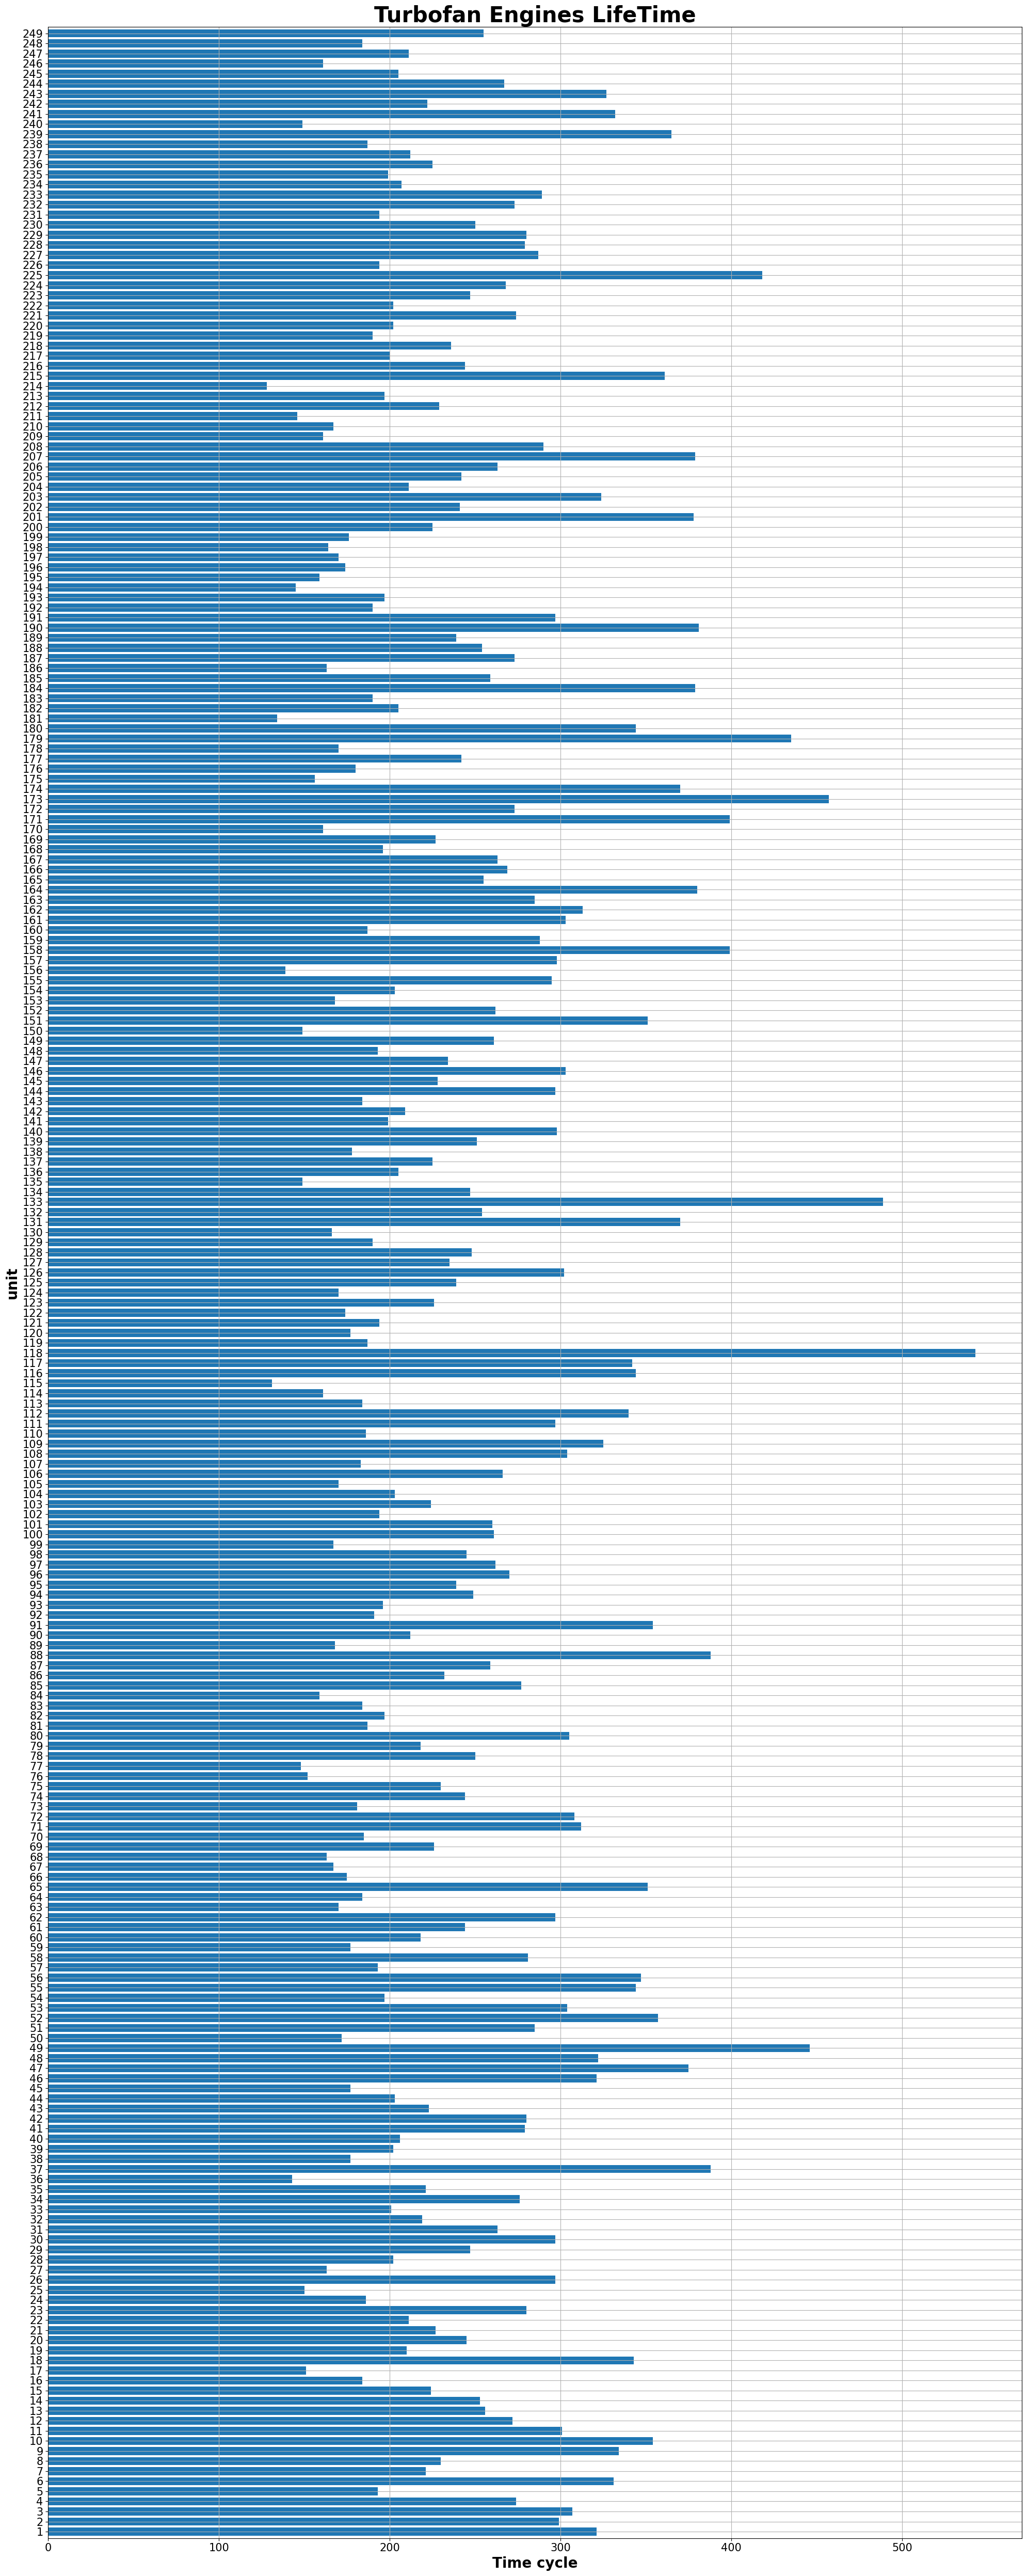

In [12]:
max_time_cycles=data.groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444438, 'Max Time Cycles')

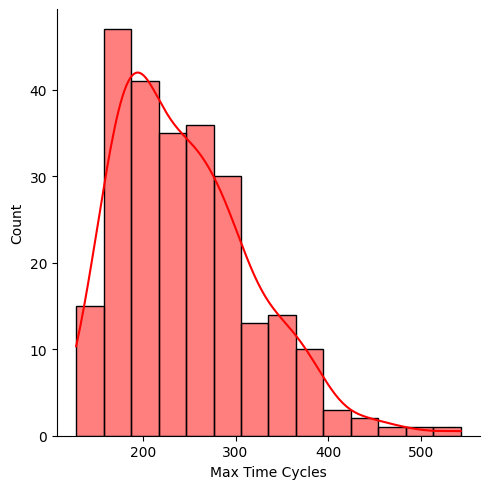

In [13]:
sns.displot(max_time_cycles['time_cycles'],kde= True, color='r')
plt.xlabel("Max Time Cycles")

## Max timecycles is in between ~190 to 300

In [21]:
def RUL_data(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [22]:
data = RUL_data(data)

In [23]:
data.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
